# Data Loading

In [5]:
import pandas as pd

In [43]:
intc = pd.read_csv('INTC_daily.csv')
intc['Date'] = pd.to_datetime(intc.Date)
intc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.192691,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.191150,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.195774,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.195004,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.188067,12172800


In [44]:
intc.set_index('Date', inplace=True)
intc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.325521,0.330729,0.325521,0.325521,0.192691,10924800
1980-03-18,0.325521,0.328125,0.322917,0.322917,0.191150,17068800
1980-03-19,0.330729,0.335938,0.330729,0.330729,0.195774,18508800
1980-03-20,0.330729,0.334635,0.329427,0.329427,0.195004,11174400
1980-03-21,0.322917,0.322917,0.317708,0.317708,0.188067,12172800


In [62]:
#Taking close price to the analysis
intc = intc.rename({'Close' : 'Price'}, axis = 1)
intc = intc.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 1)

# Describe Data

## Columns/features in data

In [63]:
intc.columns

Index(['Price', 'Volume', 'log_Close'], dtype='object')

## Data information


In [64]:
intc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10675 entries, 1980-03-17 to 2022-07-18
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      10675 non-null  float64
 1   Volume     10675 non-null  int64  
 2   log_Close  10675 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 333.6 KB


## Is there any missing values?


In [47]:
intc.isnull().values.any()

False

## Data Description


In [65]:
intc.describe()

,Price,Volume,log_Close
count,10675.000000,1.067500e+04,10675.000000
mean,19.659825,5.068983e+07,2.401558
std,17.610148,3.509574e+07,1.322435
min,0.216146,0.000000e+00,0.195687
25%,1.285156,2.686080e+07,0.826434
50%,20.010000,4.478080e+07,3.044999
75%,29.900000,6.503620e+07,3.430756
max,74.875000,5.677088e+08,4.329087


# Statistical Test



In [66]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np

In [67]:
intc["log_Price"] = np.log1p(intc.Price)

<Figure size 1440x1440 with 0 Axes>

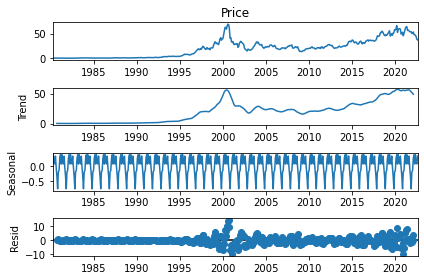

In [79]:
plt.figure(figsize=[20,10])

# Resampling to monthly to get result faster
sm.tsa.seasonal_decompose(intc.resample("M").median().Price).plot()
plt.show()

In [81]:
dickey = sm.tsa.stattools.adfuller(intc.resample("W").mean().Price)


print(f'ADF Statistic: {dickey[0]:.2f}')
print(f'p-value: {dickey[1]:.2f}')
print('Critical Values:')
for key, value in dickey[4].items():
        print(f'\t {key}: {value:.3f}')

ADF Statistic: -1.71
p-value: 0.42
Critical Values:
	 1%: -3.433
	 5%: -2.863
	 10%: -2.567


<Figure size 1440x720 with 0 Axes>

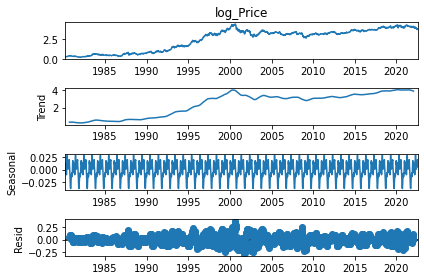

In [84]:
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(intc.resample("W").median().log_Price).plot()
plt.show()


In [86]:
dickey = sm.tsa.stattools.adfuller(intc.resample("W").mean().log_Price)


print(f'ADF Statistic: {dickey[0]:.2f}')
print(f'p-value: {dickey[1]:.2f}')
print('Critical Values:')
for key, value in dickey[4].items():
        print(f'\t {key}: {value:.3f}')
        

ADF Statistic: -1.31
p-value: 0.62
Critical Values:
	 1%: -3.433
	 5%: -2.863
	 10%: -2.567


# Validation of the model


In [87]:
import datetime

from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit

[]

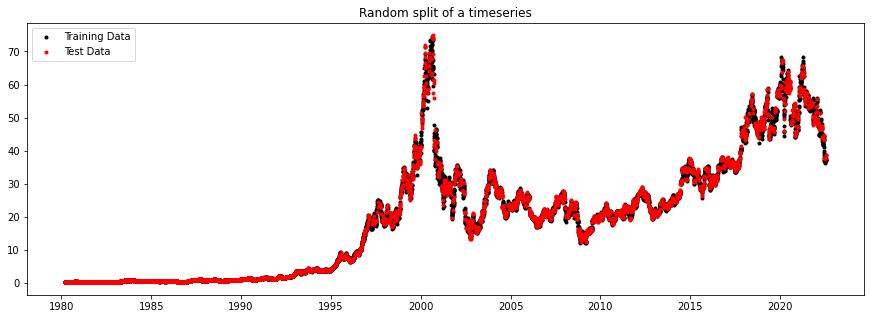

In [92]:
fig, axs = plt.subplots(figsize=[15, 5])

train, test = train_test_split(intc[["Price"]])

axs.plot(train, 'k.', lw=1, label="Training Data")
axs.plot(test,'r.', lw=1, label="Test Data")
axs.set_title(f"Random split of a timeseries")
axs.legend()
plt.plot()


## K-Fold Cross-Validation

The data is split into multiple(k) subset and tested against each individually.

In [98]:
cv = KFold()
cv

KFold(n_splits=5, random_state=None, shuffle=False)

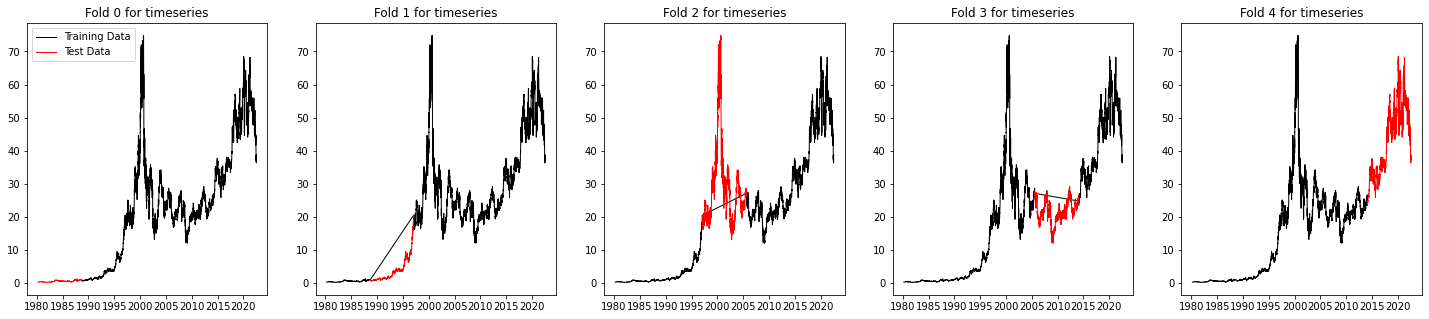

In [99]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(cv.split(intc.Price)):
    axs[i].plot(intc.Price[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(intc.Price[val_index],'r', lw=1, label="Test Data")
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


## Time-Series Cross-Validation

Due to the time dependency, we know the order of the data and the machine learning system will exploit it.

In [100]:
tscv = TimeSeriesSplit()
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

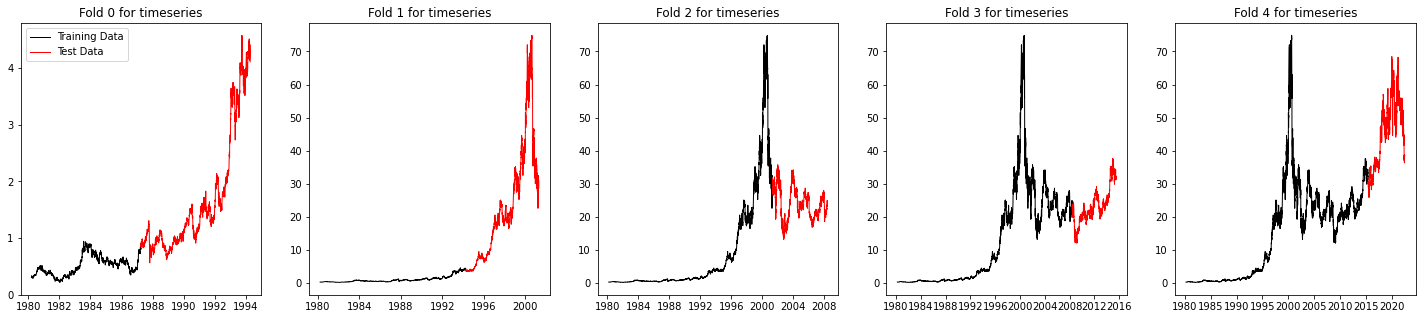

In [101]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(tscv.split(intc.Price)):
    axs[i].plot(intc.Price[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(intc.Price[val_index],'r', lw=1, label="Test Data")
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


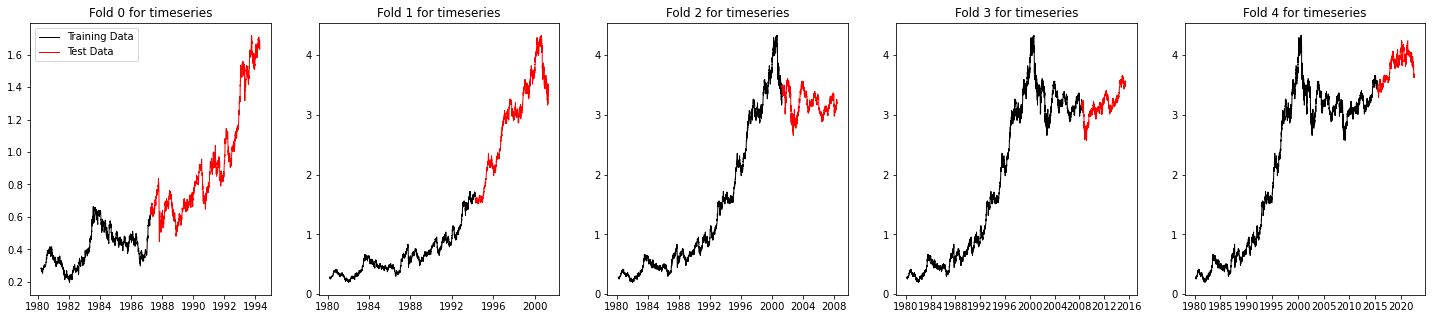

In [102]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(tscv.split(intc.log_Price)):
    axs[i].plot(intc.log_Price[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(intc.log_Price[val_index],'r', lw=1, label="Test Data")
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


# Prepare Training data
## Classic Machine Learning

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
# 80% training, 20% testing
split = int(intc.shape[0]*0.8)
df_train = intc[:split]
df_test = intc[split:]

In [118]:
def create_dataset(df, n, feature=0):
    x = []
    y = []

    for i in range(n, df.shape[0]):
        x.append(df[i-n:i, feature])
        y.append(df[i, feature])
    x = np.expand_dims(np.array(x), -1)
    y = np.expand_dims(np.array(y), -1)
    return x, y 

In [119]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(df_train)
dataset_train

array([[0.001465  , 0.01924367, 0.02083484, 0.02083484],
       [0.00143012, 0.03006612, 0.0203591 , 0.0203591 ],
       [0.00153475, 0.03260263, 0.02178353, 0.02178353],
       ...,
       [0.33986396, 0.07448607, 0.74632217, 0.74632217],
       [0.33611356, 0.08587131, 0.74376105, 0.74376105],
       [0.33370259, 0.07088317, 0.74210018, 0.74210018]])

In [120]:
dataset_test = scaler.transform(df_test)

In [126]:
X_train, y_train = create_dataset(dataset_train,50)
X_test, y_test = create_dataset(dataset_test,50)

In [127]:
X_train.shape

(8490, 50, 1)

In [128]:
y_train.shape

(8490, 1)

## Prophet


In [131]:
df_train.reset_index(inplace=True)
df_prophet = pd.DataFrame(columns=["ds", "y"])
df_prophet["ds"] = df_train.Date
df_prophet["y"] = df_train.Price
df_prophet

,ds,y
0,1980-03-17,0.325521
1,1980-03-18,0.322917
2,1980-03-19,0.330729
3,1980-03-20,0.329427
4,1980-03-21,0.317708
...,...,...
8535,2014-01-16,26.540001
8536,2014-01-17,25.850000
8537,2014-01-21,25.590000
8538,2014-01-22,25.309999


In [ ]:
df_test.reset_index(inplace=True)
df_prophet_test = pd.DataFrame(columns=["ds", "y"])
df_prophet_test["ds"] = df_test.Timestamp
df_prophet_test["y"] = df_test.Weighted_Price
df_prophet_test

,ds,y
0,2020-03-12 16:00:00,6049.065567
1,2020-03-12 17:00:00,6123.254776
2,2020-03-12 18:00:00,6081.036189
3,2020-03-12 19:00:00,6047.960700
4,2020-03-12 20:00:00,5871.514519
...,...,...
9192,2021-03-30 20:00:00,58682.385127
9193,2021-03-30 21:00:00,58705.094588
9194,2021-03-30 22:00:00,58788.454429
9195,2021-03-30 23:00:00,58666.750127


# Evaluation function


In [136]:
from sklearn.metrics import r2_score, mean_absolute_error

In [137]:
def evaluate_model(model, model_name="Model", test_data=X_test, target_data=y_test):
    y_pred_test = model.predict(test_data)

    try:
        y_pred_test = y_pred_test.yhat 
    except:
        pass

    test_rs = r2_score(target_data,y_pred_test)
    print('R Squared : ', round(test_rs,5))

    test_MAE = mean_absolute_error(target_data, y_pred_test)
    print('Mean Absolute Error: ', round(test_MAE, 5))

    plt.figure(figsize=(20,10))
    plt.plot(y_pred_test, color='green', marker='o', linestyle='dashed',label='Predicted Price')
    plt.plot(target_data, color='red', label='Actual Price')
    plt.title('Comparison of actual and predicted stock prices for ' + model_name)
    plt.xlabel('Day')
    plt.ylabel('Prices')
    plt.legend()
    plt.show()
    
    return test_rs, test_MAE

# SARIMA

- S: Seasonal
- AR: Auto Regressive model
- I: Integrated
- MA: Moving Average


In [138]:
sarima = sm.tsa.statespace.SARIMAX(intc.Price[:split],
                                   order=(1, 1, 2),
                                   seasonal_order=(1, 1, 2, 12),
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)

results = sarima.fit()
print("Time Series AIC: " + str(results.aic))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35747D-01    |proj g|=  5.47033D-01


 This problem is unconstrained.



At iterate    5    f=  8.40117D-01    |proj g|=  3.89777D-02

At iterate   10    f=  8.39780D-01    |proj g|=  2.89846D-03

At iterate   15    f=  8.39490D-01    |proj g|=  3.18046D-02

At iterate   20    f=  8.38923D-01    |proj g|=  3.68626D-03

At iterate   25    f=  8.38912D-01    |proj g|=  5.22827D-04

At iterate   30    f=  8.38884D-01    |proj g|=  7.27887D-03

At iterate   35    f=  8.38850D-01    |proj g|=  7.40280D-04

At iterate   40    f=  8.38850D-01    |proj g|=  3.52621D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     46      1     0     0   3.526D-05   8.388D-01
  F =  0.838849948067

# Facebook Prophet

In [141]:
from prophet import Prophet

In [147]:
prophet = Prophet(changepoint_prior_scale=0.15)
prophet.fit(df_prophet)

19:54:02 - cmdstanpy - INFO - Chain [1] start processing
19:54:08 - cmdstanpy - INFO - Chain [1] done processing


In [151]:
forecast = prophet.predict(df_prophet)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-03-17,0.308759,-4.199031,4.805356,0.308759,0.308759,-0.035336,-0.035336,-0.035336,0.005675,0.005675,0.005675,-0.041011,-0.041011,-0.041011,0.0,0.0,0.0,0.273423
1,1980-03-18,0.308941,-4.323849,4.618924,0.308941,0.308941,-0.042936,-0.042936,-0.042936,-0.020267,-0.020267,-0.020267,-0.022668,-0.022668,-0.022668,0.0,0.0,0.0,0.266006
2,1980-03-19,0.309123,-4.057734,4.952936,0.309123,0.309123,-0.005151,-0.005151,-0.005151,0.000580,0.000580,0.000580,-0.005730,-0.005730,-0.005730,0.0,0.0,0.0,0.303973
3,1980-03-20,0.309305,-4.394829,4.792994,0.309305,0.309305,0.029005,0.029005,0.029005,0.019649,0.019649,0.019649,0.009355,0.009355,0.009355,0.0,0.0,0.0,0.338310
4,1980-03-21,0.309487,-4.172717,4.945576,0.309487,0.309487,0.005983,0.005983,0.005983,-0.016214,-0.016214,-0.016214,0.022197,0.022197,0.022197,0.0,0.0,0.0,0.315470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8535,2014-01-16,23.561928,19.435704,27.973624,23.561928,23.561928,0.143535,0.143535,0.143535,0.019649,0.019649,0.019649,0.123886,0.123886,0.123886,0.0,0.0,0.0,23.705463
8536,2014-01-17,23.563450,19.359131,27.952625,23.563450,23.563450,0.104227,0.104227,0.104227,-0.016214,-0.016214,-0.016214,0.120441,0.120441,0.120441,0.0,0.0,0.0,23.667677
8537,2014-01-21,23.569541,18.940182,28.192254,23.569541,23.569541,0.077497,0.077497,0.077497,-0.020267,-0.020267,-0.020267,0.097764,0.097764,0.097764,0.0,0.0,0.0,23.647038
8538,2014-01-22,23.571064,19.492208,28.286330,23.571064,23.571064,0.092395,0.092395,0.092395,0.000580,0.000580,0.000580,0.091816,0.091816,0.091816,0.0,0.0,0.0,23.663459


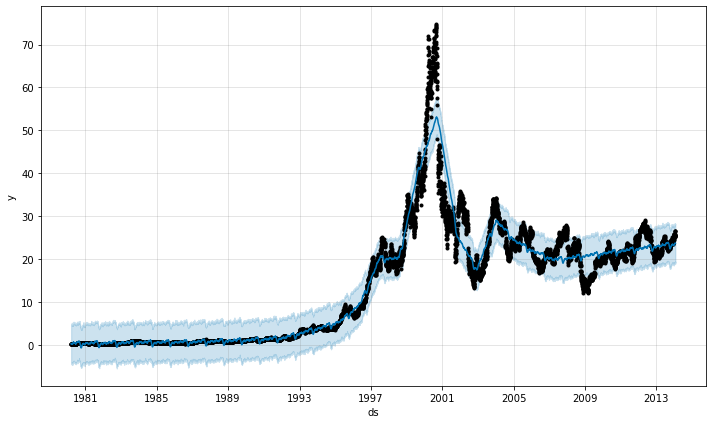

In [152]:
fig = prophet.plot(forecast)

R Squared :  0.93253
Mean Absolute Error:  1.9202


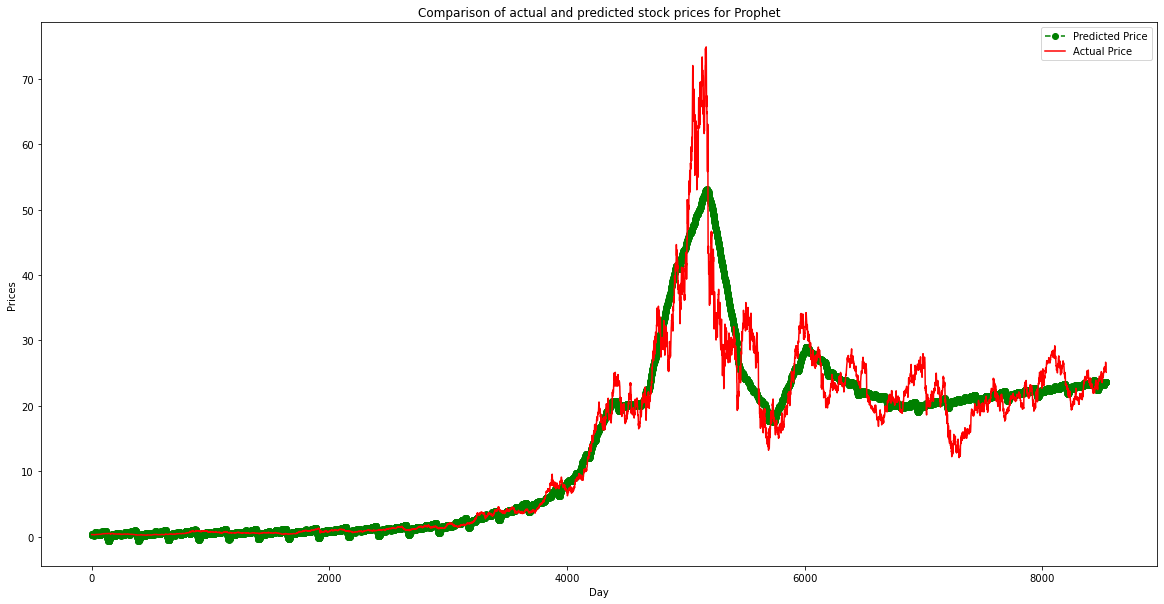

(0.9325321109024423, 1.9202033729605181)

In [153]:
evaluate_model(prophet, "Prophet", df_prophet, df_prophet.y)

# XGBoost

Spliting data to two groups based on the threshold

In [155]:
import xgboost

In [156]:
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(np.squeeze(X_train), np.squeeze(y_train))

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

R Squared :  0.97702
Mean Absolute Error:  0.01476


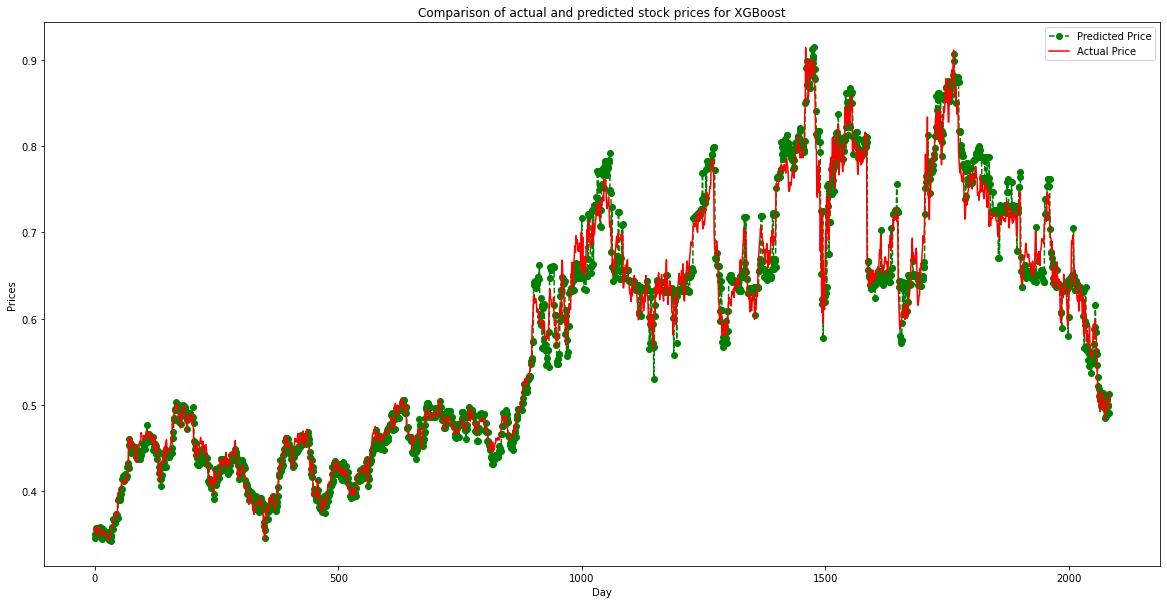

(0.977022531830805, 0.014761251966964923)

In [157]:
evaluate_model(xgb_model, model_name="XGBoost", test_data=np.squeeze(X_test), target_data=np.squeeze(y_test))

# LSTM

In [169]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu

In [170]:
LSTM_Model = Sequential()

In [171]:
#Adding layers

LSTM_Model.add(LSTM(units=96,
                    return_sequences=True,
                    input_shape=(X_train.shape[1], 1)))

LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96, 
                    return_sequences=True))

LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96, 
                    return_sequences=True))

LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96))

LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(Dense(units=1))

In [172]:
LSTM_Model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 96)            37632     
                                                                 
 dropout_8 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 96)            74112     
                                                                 
 dropout_9 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50, 96)            74112     
                                                                 
 dropout_10 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_12 (LSTM)              (None, 96)               

In [173]:
LSTM_Model.compile(loss=MSE, optimizer=Adam())

In [174]:
LSTM_Model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.05)

Epoch 1/10
253/253 [==============================] - 32s 102ms/step - loss: 0.0018 - val_loss: 2.1209e-04
Epoch 2/10
253/253 [==============================] - 26s 102ms/step - loss: 0.0010 - val_loss: 1.1574e-04
Epoch 3/10
253/253 [==============================] - 32s 125ms/step - loss: 6.9512e-04 - val_loss: 0.0071
Epoch 4/10
253/253 [==============================] - 27s 109ms/step - loss: 0.0011 - val_loss: 1.3028e-04
Epoch 5/10
253/253 [==============================] - 27s 106ms/step - loss: 6.6747e-04 - val_loss: 1.0145e-04
Epoch 6/10
253/253 [==============================] - 27s 106ms/step - loss: 6.2749e-04 - val_loss: 1.5749e-04
Epoch 7/10
253/253 [==============================] - 27s 105ms/step - loss: 5.3595e-04 - val_loss: 7.3994e-05
Epoch 8/10
253/253 [==============================] - 27s 108ms/step - loss: 4.7163e-04 - val_loss: 7.0347e-05
Epoch 9/10
253/253 [==============================] - 27s 105ms/step - loss: 5.2906e-04 - val_loss: 3.1165e-04
Epoch 10/10
253/2

66/66 [==============================] - 2s 33ms/step
R Squared :  0.97719
Mean Absolute Error:  0.01405


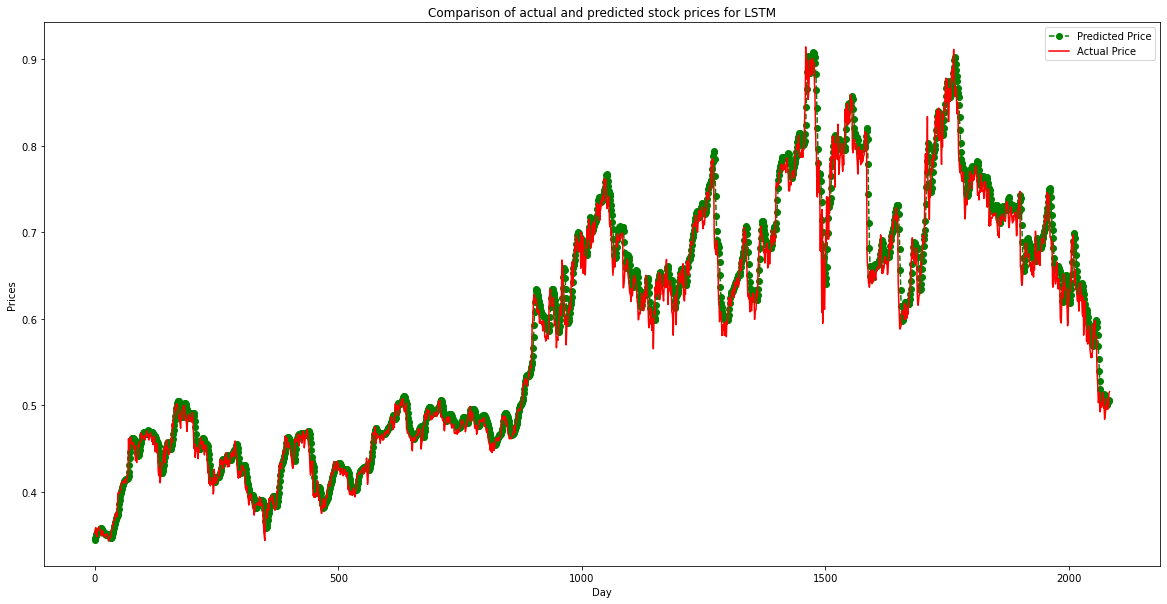

(0.9771928688375852, 0.014048934909526243)

In [176]:
evaluate_model(LSTM_Model, "LSTM")

# Convolutional Neural Network


In [191]:
#Sequential model
CNN_model=Sequential()

In [192]:
#Adding layers
CNN_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
CNN_model.add(MaxPooling1D(3))
CNN_model.add(Dropout(0.1))

#Increasing filters, reducing time series
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
CNN_model.add(MaxPooling1D(3))
CNN_model.add(Dropout(0.1))

CNN_model.add(Flatten())
CNN_model.add(Dense(32, activation='relu'))
CNN_model.add(Dense(1, activation='relu'))

In [193]:
CNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 48, 32)            128       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 16, 32)           0         
 1D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 16, 32)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 14, 64)            6208      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 dropout_19 (Dropout)        (None, 4, 64)            

In [194]:
CNN_model.compile(optimizer='adam', loss='mse')

In [195]:
#Fitting the model
CNN_model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
239/239 [==============================] - 1s 3ms/step - loss: 0.0026 - val_loss: 0.0033
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 4/20
239/239 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 9.2159e-04
Epoch 5/20
239/239 [==============================] - 1s 4ms/step - loss: 9.9844e-04 - val_loss: 9.6384e-04
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 7/20
239/239 [==============================] - 1s 3ms/step - loss: 8.6991e-04 - val_loss: 0.0012
Epoch 8/20
239/239 [==============================] - 1s 4ms/step - loss: 9.0286e-04 - val_loss: 4.8268e-04
Epoch 9/20
239/239 [==============================] - 1s 4ms/step - loss: 9.2665e-04 - val_loss: 6.7597e-04
Epoch 10/20
239/239 [==============================] - 1s 4ms/step -

66/66 [==============================] - 0s 1ms/step
R Squared :  0.4647
Mean Absolute Error:  0.09272


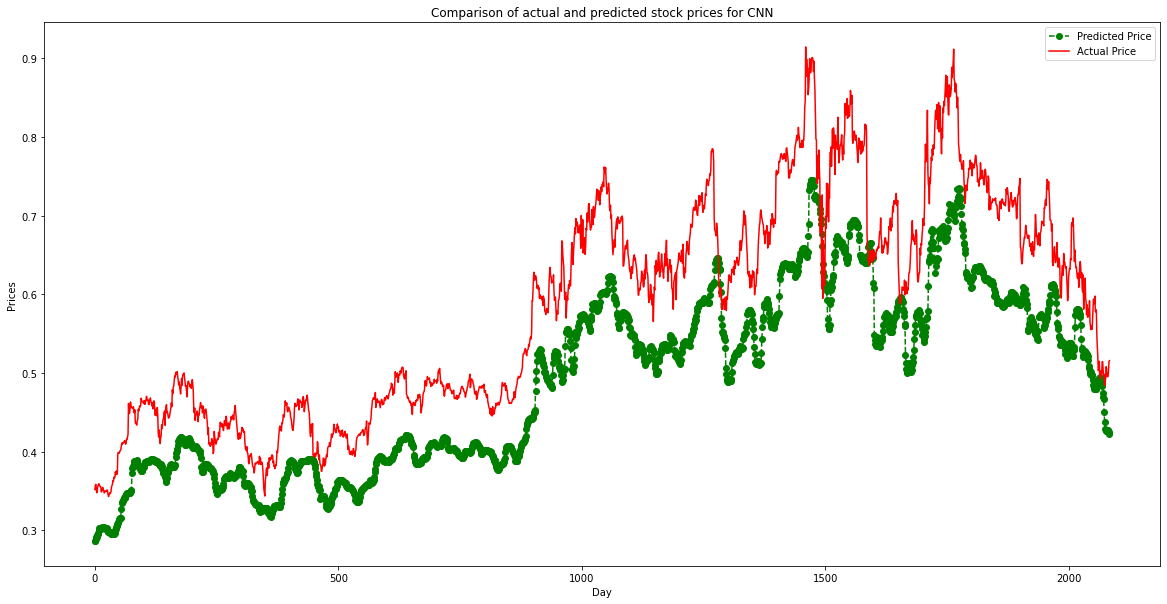

(0.4646975525733985, 0.0927166387837593)

In [197]:
evaluate_model(CNN_model, "CNN")

# Neural Prophet


In [198]:
from neuralprophet import NeuralProphet

In [199]:
neuralprophet = NeuralProphet()
neuralprophet.fit(df_prophet, freq="H")

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.604% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 107


  0%|          | 0/148 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.69E-02, min: 2.22E+00


  0%|          | 0/148 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.69E-02, min: 2.22E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.10E-02
Epoch[107/107]: 100%|█| 107/107 [00:51<00:00,  2.08it/s, SmoothL1Loss=0.0108, MA


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.994324,47.325322,58.018219,0.0
1,0.538937,30.965359,37.952011,0.0
2,0.133914,13.220135,16.691470,0.0
3,0.035012,5.879017,8.532736,0.0
4,0.028697,5.114153,7.637775,0.0
...,...,...,...,...
102,0.010921,2.557052,4.627685,0.0
103,0.010894,2.542603,4.607841,0.0
104,0.010869,2.521789,4.618899,0.0
105,0.010844,2.500875,4.597343,0.0


In [201]:
neural_forecast = neuralprophet.predict(df_prophet)
neural_forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.604% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.604% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency B


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
8535,2014-01-16,26.540001,24.131292,-2.408709,23.058334,0.162088,0.910869
8536,2014-01-17,25.850000,24.101732,-1.748268,23.060339,0.169873,0.871522
8537,2014-01-21,25.590000,24.124590,-1.465410,23.068350,0.186025,0.870216
8538,2014-01-22,25.309999,24.193106,-1.116893,23.070354,0.186391,0.936361
8539,2014-01-23,25.129999,24.168594,-0.961405,23.072359,0.185366,0.910869


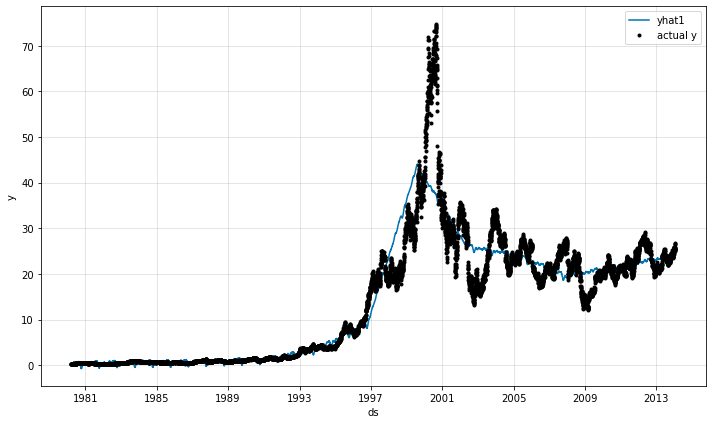

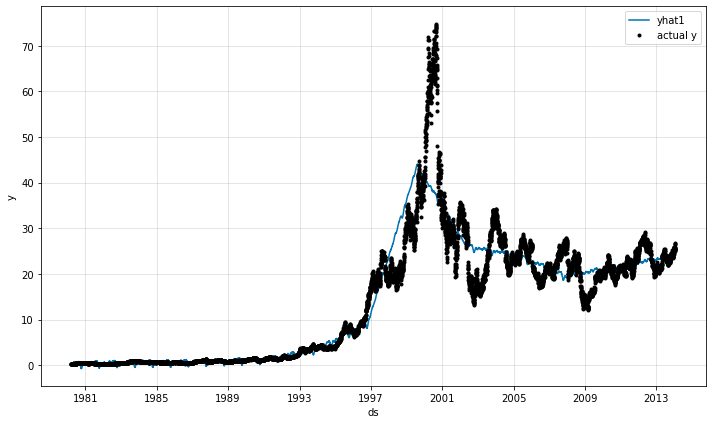

In [202]:
neuralprophet.plot(neural_forecast)

R Squared :  0.93253
Mean Absolute Error:  1.9202


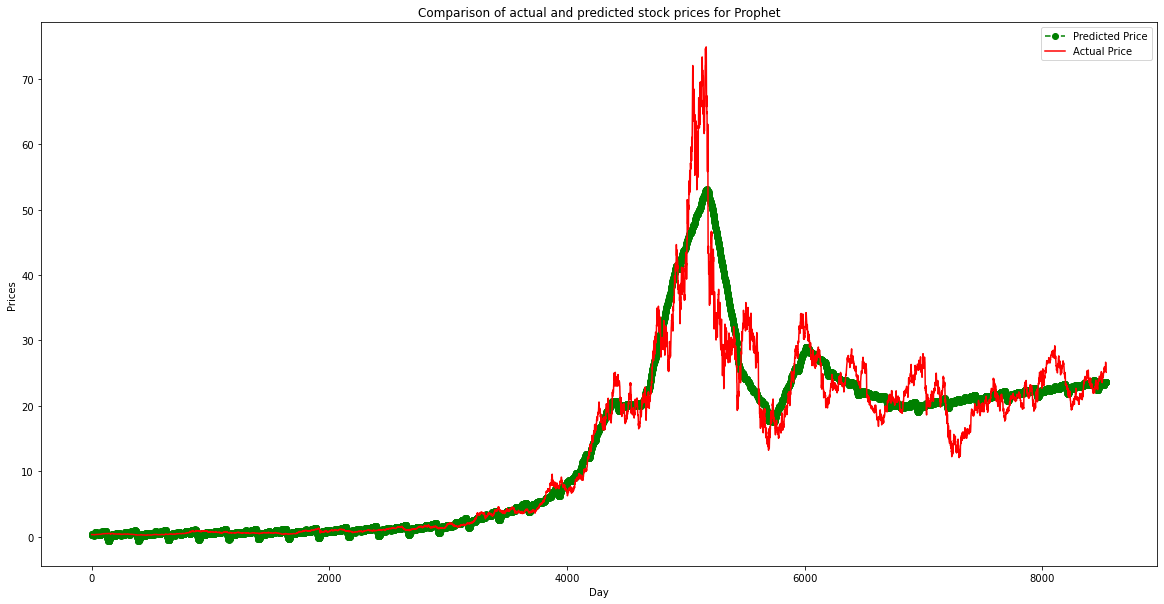

(0.9325321109024423, 1.9202033729605181)

In [205]:
evaluate_model(prophet, "Prophet", df_prophet, df_prophet.y)